In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.datasets import make_regression

In [3]:
X, y = make_regression(n_features=2, n_targets=1, n_samples=1000, noise=3.0)

<Axes: xlabel='0', ylabel='1'>

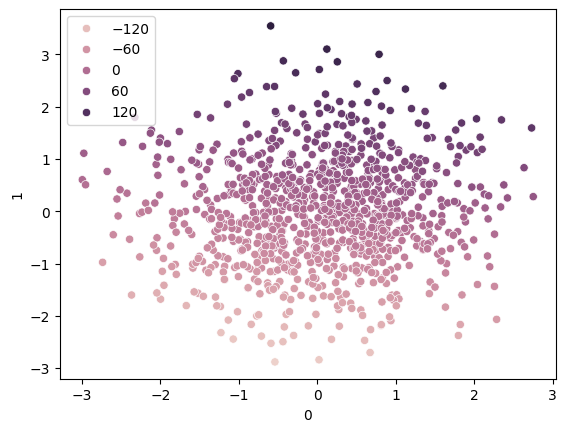

In [4]:
sns.scatterplot(x=pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue = y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42 )

In [8]:
from sklearn.svm import SVR 
svr = SVR(kernel='linear') 
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [9]:
svr.coef_

array([[10.36403866, 47.91099552]])

In [10]:
y_pred = svr.predict(X_test)

In [11]:
from sklearn.metrics import r2_score
print(r2_score(y_pred, y_test)) 

0.9962767811485331


### Hyperparameter 

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[1, 10, 100, 1000],
              'kernel':['linear'],
              'epsilon':[0.1, 0.2, 0.3],
              'gamma':[1, 0.1, 0.001, 0.0001]}

In [20]:
grid = GridSearchCV(SVR(), param_grid=param_grid, verbose=3, 
                    refit=True, cv=5, scoring='neg_mean_squared_error')

In [21]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=-7.880 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=-10.188 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=-8.780 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=-9.910 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=-9.103 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-7.880 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-10.188 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-8.780 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-9.910 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-9.103 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.001, ke

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000], 'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error', verbose=3)

In [18]:
grid.best_params_

{'C': 1, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [19]:
y_pred = grid.predict(X_test)
print(r2_score(y_pred, y_test))

0.9962767811485331
